In [1]:
import pandas as pd
import glob
import os

In [2]:
data_pth = "/Users/abhishekrajupalathoti/Documents/uber-hotspot-detection/data/"

In [3]:
all_files = glob.glob(os.path.join(data_pth, "uber-raw-data-*.csv"))

In [14]:
print("Files being merged:")
for file in all_files:
    print(file)

Files being merged:
/Users/abhishekrajupalathoti/Documents/uber-hotspot-detection/data/uber-raw-data-janjune-15.csv
/Users/abhishekrajupalathoti/Documents/uber-hotspot-detection/data/uber-raw-data-apr14.csv
/Users/abhishekrajupalathoti/Documents/uber-hotspot-detection/data/uber-raw-data-aug14.csv
/Users/abhishekrajupalathoti/Documents/uber-hotspot-detection/data/uber-raw-data-sep14.csv
/Users/abhishekrajupalathoti/Documents/uber-hotspot-detection/data/uber-raw-data-jul14.csv
/Users/abhishekrajupalathoti/Documents/uber-hotspot-detection/data/uber-raw-data-jun14.csv
/Users/abhishekrajupalathoti/Documents/uber-hotspot-detection/data/uber-raw-data-may14.csv


In [15]:
# EXCLUDE the 'janjune-15' file manually
all_files = [file for file in all_files if "janjune-15" not in file]

In [16]:
#Concatenating all datasets into one dataframe
df_list = [pd.read_csv(files) for files in all_files]
df = pd.concat(df_list, ignore_index=True)

In [17]:
print(df.columns)

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')


In [18]:
print(df.head())
print(df.tail())

          Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512
                  Date/Time      Lat      Lon    Base
4534322  5/31/2014 23:45:00  40.7309 -74.0014  B02764
4534323  5/31/2014 23:52:00  40.7528 -73.9798  B02764
4534324  5/31/2014 23:55:00  40.7158 -73.9519  B02764
4534325  5/31/2014 23:56:00  40.6961 -73.8997  B02764
4534326  5/31/2014 23:59:00  40.7393 -73.9919  B02764


In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB
None


In [20]:
#Converting 'Date/Time' feature to datetime format.
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

#Extracting features from the datetime format (hour, day, weekday, month)
df['Hour'] = df['Date/Time'].dt.hour
df['Day'] = df['Date/Time'].dt.day
df['Weekday'] = df['Date/Time'].dt.day_name()
df['Month'] = df['Date/Time'].dt.month

In [21]:
df.head()

,Date/Time,Lat,Lon,Base,Hour,Day,Weekday,Month
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,0,1,Tuesday,4
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,0,1,Tuesday,4
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,0,1,Tuesday,4
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,0,1,Tuesday,4
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,0,1,Tuesday,4


In [23]:
df.columns = [col.strip().replace(' ', '_') for col in df.columns]

In [24]:
# Rename columns for clarity
df.rename(columns={'Lat': 'Latitude', 'Lon': 'Longitude', 'Base': 'Base'}, inplace=True)

In [25]:
#Confirm columns
df.columns

Index(['Date/Time', 'Latitude', 'Longitude', 'Base', 'Hour', 'Day', 'Weekday',
       'Month'],
      dtype='object')

In [26]:
# Checking for missing values
print(df.isnull().sum())

Date/Time    0
Latitude     0
Longitude    0
Base         0
Hour         0
Day          0
Weekday      0
Month        0
dtype: int64


In [27]:
# Remove duplicate rows (just in case)
df.drop_duplicates(inplace=True)

In [28]:
# Confirm the cleaned shape
print("Cleaned data shape:", df.shape)

Cleaned data shape: (4451746, 8)


In [29]:
# Quick stats of numerical columns
print(df.describe())

           Latitude     Longitude          Hour           Day         Month
count  4.451746e+06  4.451746e+06  4.451746e+06  4.451746e+06  4.451746e+06
mean   4.073924e+01 -7.397304e+01  1.421754e+01  1.593756e+01  6.823308e+00
std    3.984343e-02  5.721967e-02  5.957576e+00  8.745713e+00  1.703878e+00
min    3.965690e+01 -7.492900e+01  0.000000e+00  1.000000e+00  4.000000e+00
25%    4.072110e+01 -7.399650e+01  1.000000e+01  9.000000e+00  5.000000e+00
50%    4.074220e+01 -7.398340e+01  1.500000e+01  1.600000e+01  7.000000e+00
75%    4.076100e+01 -7.396530e+01  1.900000e+01  2.300000e+01  8.000000e+00
max    4.211660e+01 -7.206660e+01  2.300000e+01  3.100000e+01  9.000000e+00


## EDA ##

/var/folders/p1/dpyr3mh148b4f4w13br8mfph0000gn/T/ipykernel_3377/1400173618.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='viridis')


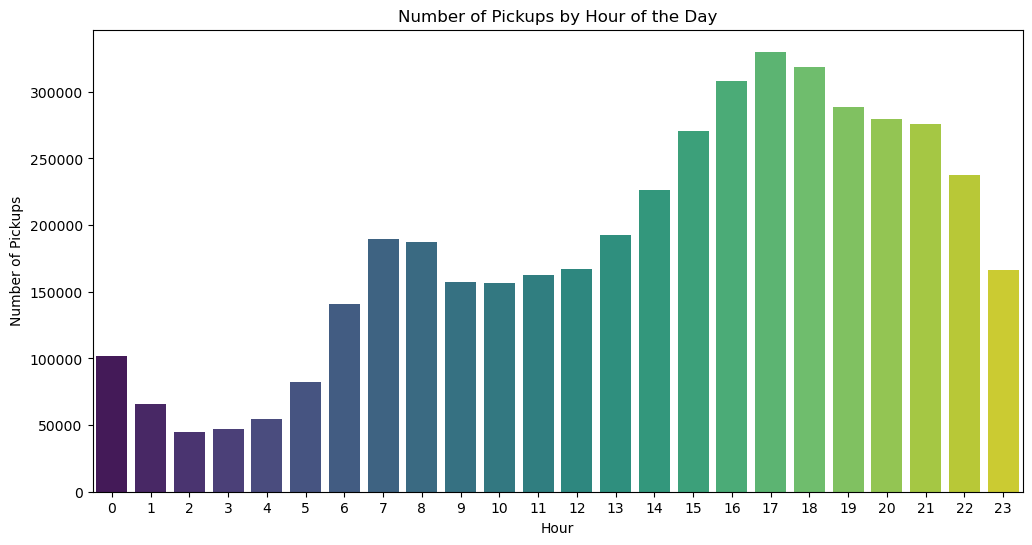

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title('Number of Pickups by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Pickups')
plt.xticks(range(0,24))
plt.show()

/var/folders/p1/dpyr3mh148b4f4w13br8mfph0000gn/T/ipykernel_3377/636480309.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weekday', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='coolwarm')


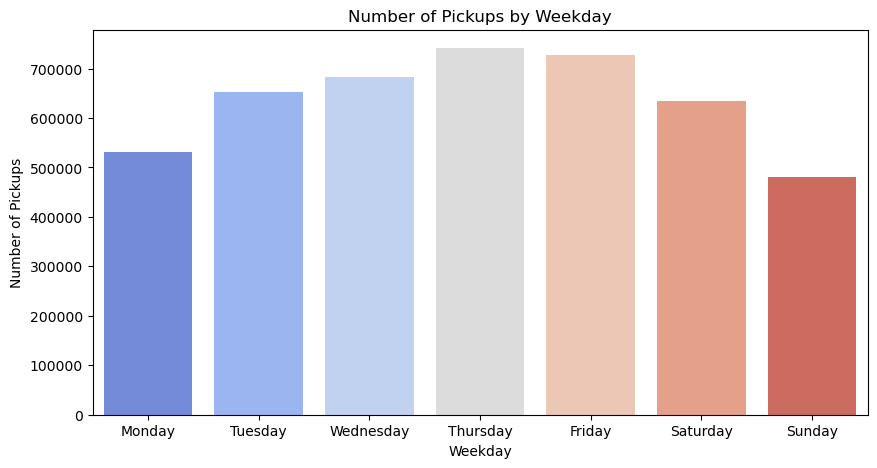

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x='Weekday', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='coolwarm')
plt.title('Number of Pickups by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Pickups')
plt.show()

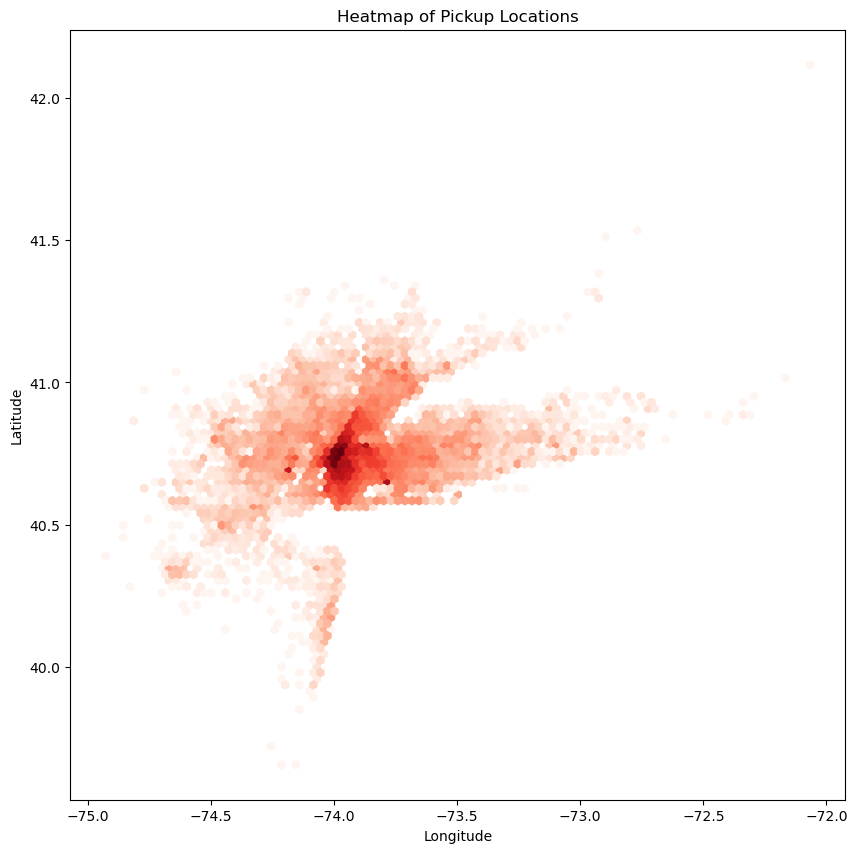

In [32]:
plt.figure(figsize=(10,10))
plt.hexbin(df['Longitude'], df['Latitude'], gridsize=100, cmap='Reds', bins='log')
plt.title('Heatmap of Pickup Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

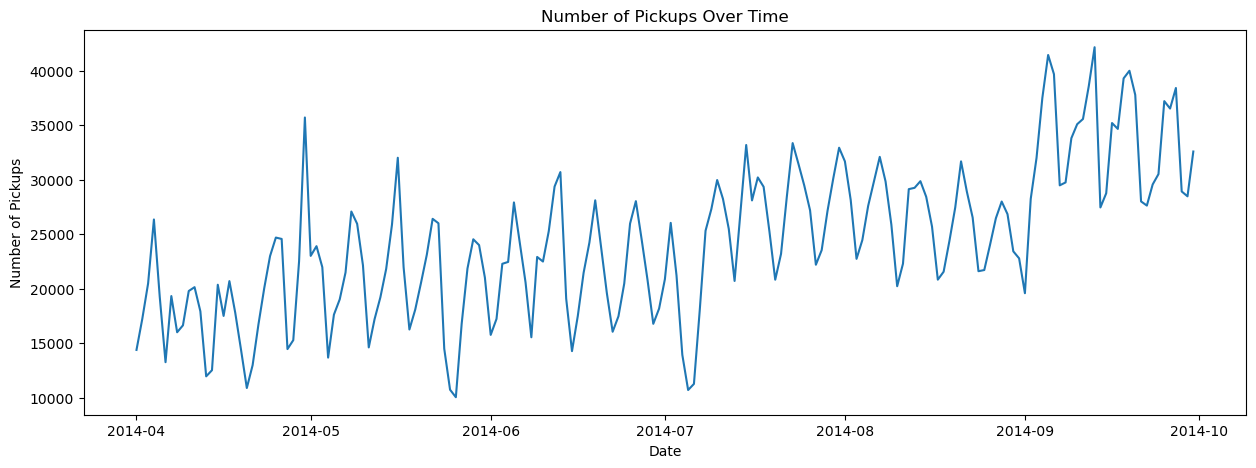

In [33]:
df['Date'] = df['Date/Time'].dt.date

# Group by date
daily_counts = df.groupby('Date').size()

plt.figure(figsize=(15,5))
daily_counts.plot(kind='line')
plt.title('Number of Pickups Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Pickups')
plt.show()

In [34]:
import os

# Create the processed data folder if it doesn't exist
processed_path = '../data/processed/'
os.makedirs(processed_path, exist_ok=True)

# Save the cleaned data
df.to_csv(os.path.join(processed_path, 'uber_data_cleaned.csv'), index=False)